In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train = pd.read_csv("data set\\spliting data\\train part_1.csv")





data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)




data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)



In [3]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,fake,-302.071228,49.365528,-19.108252,-14.032012,-30.389286,-36.168324,-23.932600,-13.940563,-12.432028,...,-2.868932,0.976674,-0.565678,2.865630,0.313434,2.755533,-1.059376,-1.506943,-4.666469,-5.640007
1,fake,-326.657471,37.011810,-12.743337,-15.496180,-33.253197,-36.571571,-18.996681,-12.591041,-13.721574,...,-4.095905,2.272382,1.100205,5.453497,2.223518,2.091987,-2.945405,-3.212942,-6.091249,-5.373946
2,fake,-300.659912,53.846485,-19.520781,-15.443893,-31.747292,-36.720802,-20.258062,-9.584642,-12.731167,...,-2.020946,3.481401,1.770988,5.058115,2.558919,3.919477,-1.406031,-2.237060,-4.306245,-3.406971
3,fake,-307.066589,57.954144,-38.837337,-23.857878,-30.164915,-41.305866,-20.534779,-5.109853,-16.138510,...,-4.133738,1.552575,0.039623,3.980213,1.699078,2.591605,-1.365822,-2.476690,-6.443559,-7.713515
4,fake,-319.395874,36.346745,-15.760772,-8.951301,-41.835155,-36.633381,-22.165915,-15.388584,-15.928928,...,-5.388357,3.699917,1.123895,5.420728,1.127657,5.811564,0.600679,-1.523881,-6.169578,-6.040505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-321.095520,12.913158,-5.230629,-7.459888,-31.499735,-31.030659,-29.189137,-12.709365,-11.085616,...,-3.483332,1.427546,1.192777,5.122873,1.213948,2.389947,-3.806898,-2.323711,-5.530445,-5.504389
117889,fake,-317.536377,52.609993,-20.829546,-27.012426,-40.451324,-36.484715,-24.294031,0.209009,-13.678177,...,-2.170617,4.856180,1.243381,3.272596,2.162720,2.595392,-1.895758,-1.397632,-6.360751,-5.640625
117890,fake,-304.375031,26.982897,-11.943795,-15.012228,-35.755066,-29.499447,-24.429689,-12.234012,-14.279325,...,-5.204808,-1.649532,-2.123222,4.426178,1.595918,4.621544,-1.340826,-1.850131,-6.844300,-7.679248
117891,fake,-370.830292,33.173607,-11.423458,-3.691128,-18.865843,-18.984251,-18.660975,-1.049585,-14.601212,...,-1.819460,-2.658169,-5.411785,-6.662932,-7.501924,-7.197669,-5.538043,-3.311715,-3.534335,-1.968856


# Encoding

In [4]:
def encodeing(row):
    if row == "real":
      row = 0
    else :
      row =1
    return row

      

In [5]:
# data_train['label'] = data_train['label'].apply(encodeing)
# data_test['label']=data_test['label'].apply(encodeing)
# data_val['label']=data_test['label'].apply(encodeing)

In [6]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,fake,-302.071228,49.365528,-19.108252,-14.032012,-30.389286,-36.168324,-23.932600,-13.940563,-12.432028,...,-2.868932,0.976674,-0.565678,2.865630,0.313434,2.755533,-1.059376,-1.506943,-4.666469,-5.640007
1,fake,-326.657471,37.011810,-12.743337,-15.496180,-33.253197,-36.571571,-18.996681,-12.591041,-13.721574,...,-4.095905,2.272382,1.100205,5.453497,2.223518,2.091987,-2.945405,-3.212942,-6.091249,-5.373946
2,fake,-300.659912,53.846485,-19.520781,-15.443893,-31.747292,-36.720802,-20.258062,-9.584642,-12.731167,...,-2.020946,3.481401,1.770988,5.058115,2.558919,3.919477,-1.406031,-2.237060,-4.306245,-3.406971
3,fake,-307.066589,57.954144,-38.837337,-23.857878,-30.164915,-41.305866,-20.534779,-5.109853,-16.138510,...,-4.133738,1.552575,0.039623,3.980213,1.699078,2.591605,-1.365822,-2.476690,-6.443559,-7.713515
4,fake,-319.395874,36.346745,-15.760772,-8.951301,-41.835155,-36.633381,-22.165915,-15.388584,-15.928928,...,-5.388357,3.699917,1.123895,5.420728,1.127657,5.811564,0.600679,-1.523881,-6.169578,-6.040505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-321.095520,12.913158,-5.230629,-7.459888,-31.499735,-31.030659,-29.189137,-12.709365,-11.085616,...,-3.483332,1.427546,1.192777,5.122873,1.213948,2.389947,-3.806898,-2.323711,-5.530445,-5.504389
117889,fake,-317.536377,52.609993,-20.829546,-27.012426,-40.451324,-36.484715,-24.294031,0.209009,-13.678177,...,-2.170617,4.856180,1.243381,3.272596,2.162720,2.595392,-1.895758,-1.397632,-6.360751,-5.640625
117890,fake,-304.375031,26.982897,-11.943795,-15.012228,-35.755066,-29.499447,-24.429689,-12.234012,-14.279325,...,-5.204808,-1.649532,-2.123222,4.426178,1.595918,4.621544,-1.340826,-1.850131,-6.844300,-7.679248
117891,fake,-370.830292,33.173607,-11.423458,-3.691128,-18.865843,-18.984251,-18.660975,-1.049585,-14.601212,...,-1.819460,-2.658169,-5.411785,-6.662932,-7.501924,-7.197669,-5.538043,-3.311715,-3.534335,-1.968856


In [7]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [8]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [9]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [10]:
y_train

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
117888,1,0
117889,1,0
117890,1,0
117891,1,0


In [11]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2432)              0         
                                                                 
 dense (Dense)               (None, 64)                155712    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 156,354
Trainable params: 156,354
Non-trainable params: 0
__________________________________________________

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.1512 - accuracy: 0.9467 - 1s/epoch - 3ms/step
Test Accuracy: 94.67%


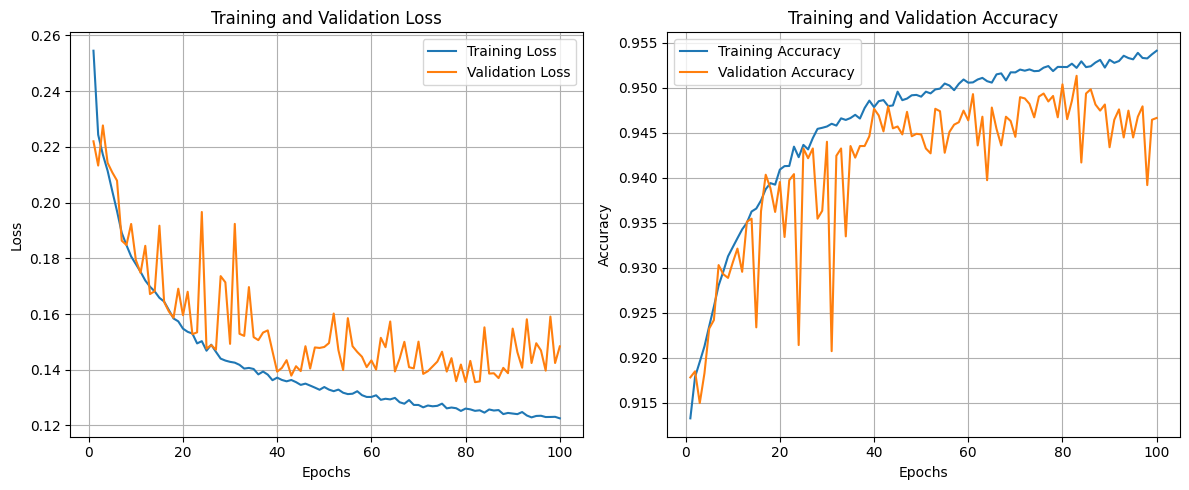

In [13]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [14]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


461/461 [==============================] - 1s 1ms/step


In [15]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,0,1
14734,1,0


In [16]:
y_ture=np.argmax(y_test.values, axis=1)


In [17]:
y_ture

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Test f1_score : 62.46%


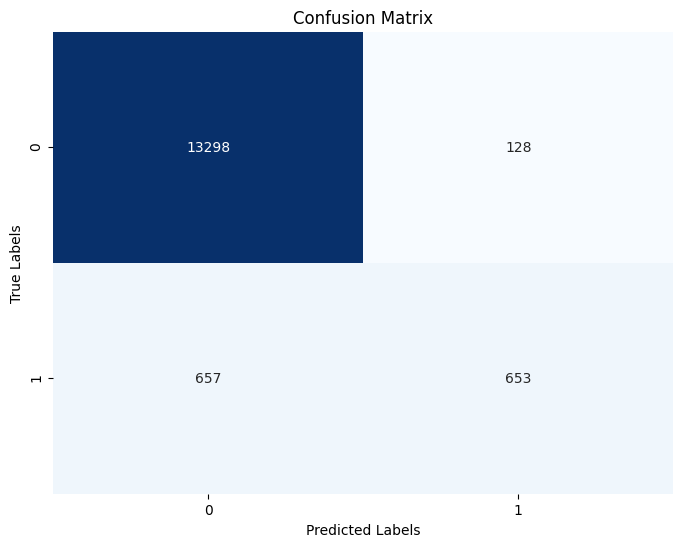

In [18]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred_classes

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [20]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,0,1
14734,1,0


# eraly stopping

In [21]:

from keras.layers import Conv1D, MaxPooling1D, Flatten

import tensorflow as tf
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus[0], 'GPU')
# logical_gpus = tf.config.list_logical_devices('GPU')
# print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

model = Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# Add a 1D convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max-pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 38, 128)           512       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 19, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2432)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                155712    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 156,354
Trainable params: 156,354
Non-trainable params: 0
________________________________________________

Epoch 1/100
1843/1843 [==============================] - 10s 5ms/step - loss: 0.2572 - accuracy: 0.9142 - val_loss: 0.2199 - val_accuracy: 0.9173
Epoch 2/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.2258 - accuracy: 0.9175 - val_loss: 0.2142 - val_accuracy: 0.9195
Epoch 3/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.2144 - accuracy: 0.9203 - val_loss: 0.2124 - val_accuracy: 0.9184
Epoch 4/100
1843/1843 [==============================] - 10s 5ms/step - loss: 0.2072 - accuracy: 0.9214 - val_loss: 0.2214 - val_accuracy: 0.9180
Epoch 5/100
1843/1843 [==============================] - 9s 5ms/step - loss: 0.1961 - accuracy: 0.9256 - val_loss: 0.1923 - val_accuracy: 0.9231
Epoch 6/100
1843/1843 [==============================] - 10s 5ms/step - loss: 0.1872 - accuracy: 0.9289 - val_loss: 0.1903 - val_accuracy: 0.9270
Epoch 7/100
1843/1843 [==============================] - 10s 5ms/step - loss: 0.1822 - accuracy: 0.9302 - val_loss: 0.1810 - va

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.1406 - accuracy: 0.9488 - 1s/epoch - 2ms/step
Test Accuracy: 94.88%


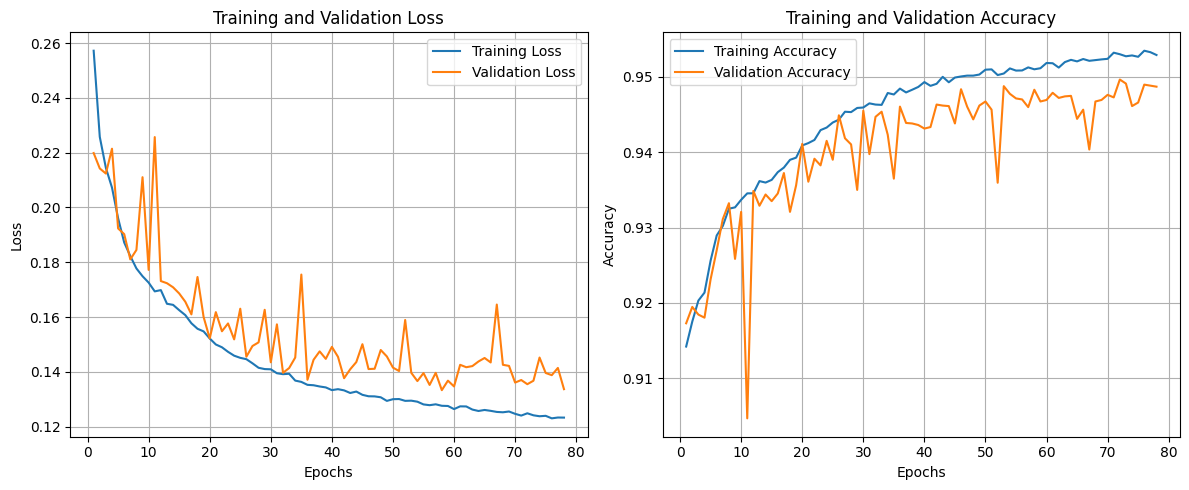

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 1ms/step
Test f1_score : 64.53%


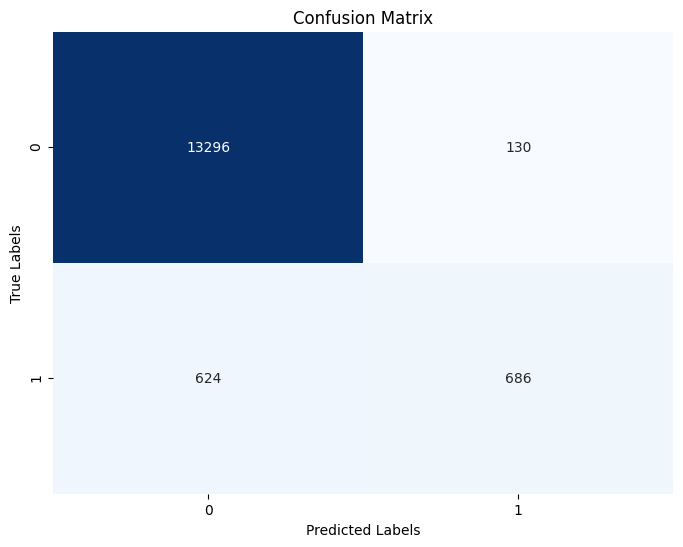

In [24]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()